In [2]:
import os
import keras
import numpy as np
import cv2
import pandas
from matplotlib import pyplot as plt

### Experimenting with data

In [3]:
data = pandas.read_csv('../dataset/list_attr_celeba.csv')

In [4]:
print(data.loc[data['image_id']=='000002.jpg']['Wearing_Lipstick'].values[0])

-1


### Experimenting with CelebFaces
* We load the imgs with CV2 which loads in BGR on 255 scale 
* We convert to BGR -> RGB on 1 scale

In [5]:
img = cv2.imread('../dataset/faces/000001.jpg')

In [6]:
print(img.shape)

(218, 178, 3)


In [7]:
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(rgb_img[0,0,:]/255)

[0.99215686 0.90588235 0.76078431]


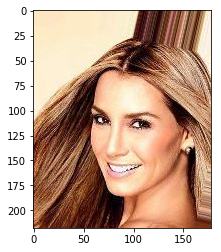

In [8]:
plt.imshow(rgb_img)

### Prepare dataset for training
* Load images from directory
* Convert BGR scale 255 to RBG with scale of 1

In [9]:
files = os.listdir('../dataset/faces/')

In [10]:
import random
def get_data(howmany=10):
    imgs = np.empty([0,50,41,3])
    y = list()
    random.shuffle(files)
    for i,x in enumerate(files[0:howmany]):
        img = cv2.imread('../dataset/faces/%s'% x)
        img = cv2.resize(img, (41, 50)) 
        rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)[:,:,:]/255
        imgs = np.vstack((imgs, [rgb_img]))
        x = data.loc[data['image_id']==x]['Wearing_Lipstick'].values[0]
        y.append([0,1] if x == -1 else [1,0])
    return imgs, y

In [11]:
from numpy import array

train_x, train_y = get_data(1000)
val_x, val_y = get_data(1000)
test_x, test_y = get_data(20)

train_y = array(train_y)
val_y = array(val_y)
test_y = array(test_y)

## Process the data


In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from numpy import array

In [13]:
#  32 is the filters
#  5 is kernel_size
def get_model():
    model = Sequential()
    model.add(Conv2D(32,5,input_shape=train_x[0].shape))
    model.add(Dropout(0.1))
    model.add(Conv2D(64,5))
    model.add(Dropout(0.1))
    model.add(Conv2D(128,5))
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Dense(64))
    model.add(Dense(2))
    model.add(Activation('softmax'))
    return model


In [ ]:
batch_size = 10
epochs = 10
learning_rate = 0.01
model = get_model()
print(model.summary())
model.compile(Adam(lr=learning_rate),'mean_absolute_error')
model.fit(x=train_x,y=train_y, batch_size=batch_size,epochs=epochs, validation_data=(val_x,val_y))
model.evaluate(x=test_x,y=test_y)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 37, 32)        2432      
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 33, 64)        51264     
_________________________________________________________________
dropout_2 (Dropout)          (None, 42, 33, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 38, 29, 128)       204928    
_________________________________________________________________
flatten_1 (Flatten)          (None, 141056)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               18055296  
__________